# 3 Data Wrangling - Duplicate Transactions

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Load the CSV file into a new dataframe
df = pd.read_csv(r'C:\Users\navee\CapitalOne_Coding\finaldataset1.csv')

In [3]:
df


,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchingCVV
0,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,PURCHASE,0.00,0,0,0,1
1,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,PURCHASE,0.00,1,0,0,1
2,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,PURCHASE,0.00,0,0,0,1
3,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,PURCHASE,0.00,0,0,0,1
4,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,PURCHASE,0.00,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,PURCHASE,1095.04,0,0,0,1
786359,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,PURCHASE,1214.96,0,0,0,1
786360,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,PURCHASE,1233.85,0,0,0,1
786361,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,PURCHASE,1283.28,0,0,0,1


In [4]:
df.isnull().sum()

customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
matchingCVV                    0
dtype: int64

In [5]:
pd.DataFrame(df.isnull().sum()).reset_index(drop=False).sort_values(by=0,ascending=False)[:11]

,index,0
6,acqCountry,4562
8,posEntryMode,4054
7,merchantCountryCode,724
11,transactionType,698
9,posConditionCode,409
10,merchantCategoryCode,0
15,isFraud,0
14,expirationDateKeyInMatch,0
13,cardPresent,0
12,currentBalance,0


In [6]:
df.isnull().sum()

customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
matchingCVV                    0
dtype: int64

In [7]:
# Impute missing values with mode (most frequent value)
df['acqCountry'].fillna(df['acqCountry'].mode()[0], inplace=True)
df['merchantCountryCode'].fillna(df['merchantCountryCode'].mode()[0], inplace=True)
df['posEntryMode'].fillna(df['posEntryMode'].mode()[0], inplace=True)
df['posConditionCode'].fillna(df['posConditionCode'].mode()[0], inplace=True)
df['transactionType'].fillna(df['transactionType'].mode()[0], inplace=True)

C:\Users\navee\AppData\Local\Temp\ipykernel_15984\880729139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['acqCountry'].fillna(df['acqCountry'].mode()[0], inplace=True)
C:\Users\navee\AppData\Local\Temp\ipykernel_15984\880729139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [8]:
df

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchingCVV
0,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,PURCHASE,0.00,0,0,0,1
1,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,PURCHASE,0.00,1,0,0,1
2,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,PURCHASE,0.00,0,0,0,1
3,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,PURCHASE,0.00,0,0,0,1
4,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,PURCHASE,0.00,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,PURCHASE,1095.04,0,0,0,1
786359,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,PURCHASE,1214.96,0,0,0,1
786360,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,PURCHASE,1233.85,0,0,0,1
786361,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,PURCHASE,1283.28,0,0,0,1


In [9]:
df.isnull().sum()

customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
matchingCVV                 0
dtype: int64

I created 'Date' column by splitting original 'TransactionDate' column.The dataset obtains transactions in year 2016.

In [11]:
df['Date']=df['transactionDateTime'].apply(lambda x: x.split('T')[0]) # create 'Date' column

In [12]:

def concat(x):
    y=str('T') + str(x)
    return y

In [13]:
df.reset_index(drop=False,inplace=True)
df['transactionKey']=df['index'].apply(lambda x: concat(x))
df.drop(['index'],axis=1,inplace=True)

In [14]:
df['Date']=df['transactionDateTime'].apply(lambda x: x.split('T')[0]) # create 'Date' column

This table indicates how many transactions each account had for each merchant in year 2016. (use the table in the next steps)

In [16]:
cust_length=df.groupby(['customerId','merchantName']).count()['Date']
cust_length=pd.DataFrame(cust_length).reset_index()
cust_length.columns=['customerId','merchantName','Count']
cust_length.head()

,customerId,merchantName,Count
0,100088067,1st BBQ,1
1,100088067,1st Pub,1
2,100088067,1st Sandwitch Bar #758805,1
3,100088067,34th BBQ #412895,1
4,100088067,AMC #191138,1


In [17]:
# Detect Reversal Transactions.

Firstly, I created Timestamp feature by modifying 'transactionDateTime' column and replaced null values of transaction type with 'Purchase'. Then, I sorted datasets based on several columns such as customerID, merchantName and Timestamp in ascending order.

In [19]:
card_data=df.copy() # make a copy
card_data['transactionType']=card_data['transactionType'].fillna(value='PURCHASE')
card_data['Date']=card_data['transactionDateTime'].apply(lambda x: x.split('T')[0]) # create 'Date' column
card_data['Time']=card_data['transactionDateTime'].apply(lambda x: x.split('T')[1]) # create 'Date' column
card_data.Date=pd.to_datetime(card_data.Date)
card_data['Timestamp']=pd.to_datetime(card_data.Date.astype(str)+' '+card_data.Time.astype(str))

In [20]:
card_data=card_data[['customerId','merchantName','transactionAmount','transactionType','transactionKey','Timestamp']]
card_data=card_data.sort_values(by=['customerId','merchantName','Timestamp'],ascending=True)

Assumption 1: Transaction amount of 'address_verification' is 0; there is no effect in modeling part. Hence, I removed the transactions whose type is 'address_verification'.

In [22]:
# remove the observations including 'ADDRESS_VERIIFICATION'
card_data=card_data.reset_index(drop=True)
card_data=card_data[-(card_data.transactionType=='ADDRESS_VERIFICATION')]
card_data=card_data.reset_index(drop=True)

Assumption 2: I suppose that purchase and reversal transactions are successive and the same $ amount. Hence, I took indexes of reversal transactions and purchase transactions by using 'transactionType' feature.

In [24]:
reversal_index=card_data[card_data['transactionType']=='REVERSAL'].index.values.astype(int)

In [25]:
second_reversal=card_data.iloc[reversal_index]
second_reversal.head(2)

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
13,100088067,AMC #79863,22.32,REVERSAL,T541964,2016-11-20 08:00:04
124,100328049,Lyft,43.74,REVERSAL,T87920,2016-01-15 20:36:18


In [26]:
previous_index=reversal_index-1

In [27]:
first_reversal=card_data.iloc[previous_index]
first_reversal.head(2)

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
12,100088067,AMC #79863,22.32,PURCHASE,T541963,2016-11-20 07:57:05
123,100328049,Lyft,43.74,PURCHASE,T87919,2016-01-15 20:34:35


I created the dataframe which demonstrates indexes and transaction amounts of purchase and reversal transactions. Then, I realized that purchase transactions and its reversal transactions do not have to be consecutive.

In [29]:
previndex=pd.DataFrame(previous_index)
previndex.columns=['Purchase_Index'] # rename columns

In [30]:
revindex=pd.DataFrame(reversal_index)
revindex.columns=['Reversal_Index'] # rename columns

In [31]:
firstreverse=pd.DataFrame(first_reversal['transactionAmount'].values)
firstreverse.columns=['Purchase_Amount'] # rename columns

In [32]:
secondreverse=pd.DataFrame(second_reversal['transactionAmount'].values)
secondreverse.columns=['Reversal_Amount'] # rename columns

In [33]:
logic=pd.concat([previndex,firstreverse,revindex,secondreverse],axis=1) # merge all dataframes vertically
logic.head()

,Purchase_Index,Purchase_Amount,Reversal_Index,Reversal_Amount
0,12,22.32,13,22.32
1,123,43.74,124,43.74
2,139,284.97,140,284.97
3,262,93.67,263,93.67
4,277,501.29,278,501.29


In [34]:
logic['NotEqual']=logic[['Purchase_Amount','Reversal_Amount']].apply(lambda x: True if (x[0]!=x[1]) else False,axis=1)

C:\Users\navee\AppData\Local\Temp\ipykernel_15984\2910748599.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logic['NotEqual']=logic[['Purchase_Amount','Reversal_Amount']].apply(lambda x: True if (x[0]!=x[1]) else False,axis=1)


In [35]:
logic=logic[-(logic.Reversal_Amount==0)] # exlude the transactions whose amount is $0.

In [36]:
logic.NotEqual.value_counts() # check whether purchase and reversal transactions are successive or not

NotEqual
False    12665
True      7066
Name: count, dtype: int64

I saved the transactions whose purchase and reversal types are consecutive (size:12665)

In [38]:
capture1=logic.loc[logic['NotEqual'] == False, 'Reversal_Index'].values #take reversal indexes
capture2=logic.loc[logic['NotEqual'] == False, 'Purchase_Index'].values #take purchase indexes
cpt=np.concatenate((capture1, capture2)) # combine two arrays
cpt1=card_data.iloc[cpt] # take dataframe regarding these indexes

In [39]:
cpt1=cpt1.sort_values(by=['customerId','merchantName','Timestamp'],ascending=True)
cpt1.head(3)

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
12,100088067,AMC #79863,22.32,PURCHASE,T541963,2016-11-20 07:57:05
13,100088067,AMC #79863,22.32,REVERSAL,T541964,2016-11-20 08:00:04
123,100328049,Lyft,43.74,PURCHASE,T87919,2016-01-15 20:34:35


In [40]:
cpt1.transactionType.value_counts() # check the distribution

transactionType
PURCHASE    12665
REVERSAL    12665
Name: count, dtype: int64

In [41]:
warnings.filterwarnings("ignore")
cpt1['ID'] = cpt1.customerId.map(str) + "-" + cpt1.merchantName
cpt1.head()

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp,ID
12,100088067,AMC #79863,22.32,PURCHASE,T541963,2016-11-20 07:57:05,100088067-AMC #79863
13,100088067,AMC #79863,22.32,REVERSAL,T541964,2016-11-20 08:00:04,100088067-AMC #79863
123,100328049,Lyft,43.74,PURCHASE,T87919,2016-01-15 20:34:35,100328049-Lyft
124,100328049,Lyft,43.74,REVERSAL,T87920,2016-01-15 20:36:18,100328049-Lyft
139,100328049,McDonalds #423357,284.97,PURCHASE,T87935,2016-03-24 22:57:15,100328049-McDonalds #423357


In [42]:
rvs=logic.loc[logic['NotEqual'] == True, 'Reversal_Index'].values 

In [43]:
nexts=card_data.iloc[rvs]

In [44]:

nexts.head(5)

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
669,101380713,sears.com,5.03,REVERSAL,T3010,2016-06-22 22:10:22
848,101661970,American Airlines,18.15,REVERSAL,T470094,2016-04-24 14:03:36
1047,101738384,discount.com,174.92,REVERSAL,T736347,2016-03-17 05:37:44
1161,101738384,staples.com,954.71,REVERSAL,T736421,2016-06-11 00:47:21
1329,101876201,discount.com,163.75,REVERSAL,T542091,2016-06-28 10:10:22


In [45]:

nexts.transactionKey.nunique()

7066

In [46]:
card_upd=card_data[-(card_data.transactionType=='REVERSAL')]

In [47]:
warnings.filterwarnings("ignore")
nexts['ID'] = nexts.customerId.map(str) + "-" + nexts.merchantName

I wrote the "for loop" below which helps exploring purchase transactions associated to reversal ones when they are not consecutive.

In [49]:
# Optimize the loop by reducing unnecessary repeated computations
dfz = {}

# Use groupby to avoid recomputing groupings multiple times
grouped_nexts = nexts.groupby(['customerId', 'merchantName'])
grouped_card_upd = card_upd.groupby(['customerId', 'merchantName'])

for (i, j), inter in grouped_nexts:
    # Check if combination exists in nexts.ID and avoid recomputing inter
    if f"{i}-{j}" in nexts.ID.values:
        # Iterate over inter rows to find matching transaction amounts
        for idx, z in inter.iterrows():
            amnt = z.transactionAmount
            # Filter only once from card_upd for a customerId-merchantName pair
            df_filtered = grouped_card_upd.get_group((i, j))
            q = df_filtered[df_filtered.transactionAmount == amnt]
            dfz[i, j, idx] = q



After, I created the dataframe to combine all purchase transactions associated to reversal ones.

In [51]:
# Initialize an empty list to store DataFrames instead of using append
df_list = []

nrow = len(dfz.keys())
for i in range(nrow):
    df_inter = dfz[[*dfz.keys()][i]]
    df_list.append(df_inter)  # Collect DataFrames in a list

# Use pd.concat() to combine all DataFrames into one
df_upd_data = pd.concat(df_list, ignore_index=True)
df_upd_data.head()


,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
0,101738384,discount.com,174.92,PURCHASE,T736332,2016-03-03 19:51:21
1,101738384,staples.com,954.71,PURCHASE,T736406,2016-05-26 07:14:32
2,101876201,staples.com,30.52,PURCHASE,T541975,2016-01-01 02:47:25
3,102755773,gap.com,81.69,PURCHASE,T690279,2016-10-08 21:12:06
4,102755773,target.com,53.78,PURCHASE,T690011,2016-01-29 19:10:40


In [52]:
warnings.filterwarnings("ignore")
df_upd_data['ID'] = df_upd_data.customerId.map(str) + "-" + df_upd_data.merchantName
df_upd_data.head()

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp,ID
0,101738384,discount.com,174.92,PURCHASE,T736332,2016-03-03 19:51:21,101738384-discount.com
1,101738384,staples.com,954.71,PURCHASE,T736406,2016-05-26 07:14:32,101738384-staples.com
2,101876201,staples.com,30.52,PURCHASE,T541975,2016-01-01 02:47:25,101876201-staples.com
3,102755773,gap.com,81.69,PURCHASE,T690279,2016-10-08 21:12:06,102755773-gap.com
4,102755773,target.com,53.78,PURCHASE,T690011,2016-01-29 19:10:40,102755773-target.com


In [53]:
cpt2=pd.concat([df_upd_data,nexts],axis=0)
cpt2=cpt2.sort_values(by=['customerId','merchantName','Timestamp'],ascending=True)
cpt2=cpt2.reset_index(drop=True)
cpt2.head()

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp,ID
0,101380713,sears.com,5.03,REVERSAL,T3010,2016-06-22 22:10:22,101380713-sears.com
1,101661970,American Airlines,18.15,REVERSAL,T470094,2016-04-24 14:03:36,101661970-American Airlines
2,101738384,discount.com,174.92,PURCHASE,T736332,2016-03-03 19:51:21,101738384-discount.com
3,101738384,discount.com,174.92,REVERSAL,T736347,2016-03-17 05:37:44,101738384-discount.com
4,101738384,staples.com,954.71,PURCHASE,T736406,2016-05-26 07:14:32,101738384-staples.com


In [54]:
cpt2.transactionType.value_counts()

transactionType
REVERSAL    7066
PURCHASE    5284
Name: count, dtype: int64


Lessons Learned: I was not able to match 4268 reversal transactions. The possible reasons for this are 1. Data Quality 2. Transaction amount in purchase being different than the reversal amount.

In [56]:
all_reversal=pd.concat([cpt1,cpt2],axis=0).reset_index(drop=True)
all_reversal.head()

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp,ID
0,100088067,AMC #79863,22.32,PURCHASE,T541963,2016-11-20 07:57:05,100088067-AMC #79863
1,100088067,AMC #79863,22.32,REVERSAL,T541964,2016-11-20 08:00:04,100088067-AMC #79863
2,100328049,Lyft,43.74,PURCHASE,T87919,2016-01-15 20:34:35,100328049-Lyft
3,100328049,Lyft,43.74,REVERSAL,T87920,2016-01-15 20:36:18,100328049-Lyft
4,100328049,McDonalds #423357,284.97,PURCHASE,T87935,2016-03-24 22:57:15,100328049-McDonalds #423357


In [57]:
all_reversal['transactionType'].value_counts()

transactionType
REVERSAL    19731
PURCHASE    17949
Name: count, dtype: int64

In [58]:
# Convert 'transactionAmount' to numeric (if it's not already) and handle errors
all_reversal['transactionAmount'] = pd.to_numeric(all_reversal['transactionAmount'], errors='coerce')

# Now, you can safely perform the sum operation
all_reversal.groupby(['transactionType'])['transactionAmount'].sum()


transactionType
PURCHASE    2690442.87
REVERSAL    2821792.50
Name: transactionAmount, dtype: float64

# Remove Duplicates (Reversal Transactions)

In [60]:
credit_card_no_duplicate=card_data[~(card_data.transactionKey.isin(all_reversal.transactionKey))]

In [61]:

credit_card_no_duplicate.shape

(728521, 6)

In [62]:
credit_card_no_duplicate.head(3)

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
0,100088067,1st BBQ,200.12,PURCHASE,T541917,2016-04-08 19:56:36
1,100088067,1st Pub,95.11,PURCHASE,T541962,2016-11-09 07:26:06
2,100088067,1st Sandwitch Bar #758805,5.26,PURCHASE,T541920,2016-05-06 02:54:01


In [63]:
# Multiple Swipes detection

In [64]:

transactions_mlt=credit_card_no_duplicate
transactions_mlt.head()

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
0,100088067,1st BBQ,200.12,PURCHASE,T541917,2016-04-08 19:56:36
1,100088067,1st Pub,95.11,PURCHASE,T541962,2016-11-09 07:26:06
2,100088067,1st Sandwitch Bar #758805,5.26,PURCHASE,T541920,2016-05-06 02:54:01
3,100088067,34th BBQ #412895,141.60,PURCHASE,T541904,2016-02-03 04:48:54
4,100088067,AMC #191138,304.15,PURCHASE,T541925,2016-06-03 18:50:55


In [68]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Assuming your dataset is already in the DataFrame `transactions_mlt`
# Sort the dataset by customerId, merchantName, and Timestamp
transactions_mlt = transactions_mlt.sort_values(by=['customerId', 'merchantName', 'Timestamp'])

# Group by customerId and merchantName, and apply the logic for time and amount differences
transactions_mlt['SecondsDiff'] = transactions_mlt.groupby(['customerId', 'merchantName'])['Timestamp'].diff().dt.total_seconds().fillna(999999)
transactions_mlt['AmountDiff'] = transactions_mlt.groupby(['customerId', 'merchantName'])['transactionAmount'].diff().fillna(999999)

# Define MultiSwipe transactions (within 180 seconds and the same amount)
transactions_mlt['MultiSwipes'] = (transactions_mlt['SecondsDiff'] < 180) & (transactions_mlt['AmountDiff'] == 0)

# Filter out MultiSwipe transactions
swipes = transactions_mlt[transactions_mlt['MultiSwipes'] == True]

# Calculate the total number and dollar amount of MultiSwipe transactions
total_multi_swipes = swipes['transactionAmount'].count()
total_multi_swipes_amount = swipes['transactionAmount'].sum()

# Print the results
print(f"Total number of multi-swipe transactions: {total_multi_swipes}")
print(f"Total dollar amount of multi-swipe transactions: ${total_multi_swipes_amount}")


Total number of multi-swipe transactions: 7248
Total dollar amount of multi-swipe transactions: $1069721.9900000002


Remove Duplicates (Multiple Swipes)
I captured 72484 multi-swipes in the original data and removed it.

In [72]:
processed_data=credit_card_no_duplicate[~(credit_card_no_duplicate.transactionKey.isin(swipes.transactionKey))]
processed_data=processed_data[~(processed_data.transactionType=='REVERSAL')]

In [74]:
processed_data.shape

(720701, 6)

In [76]:
processed_data.head(3)

,customerId,merchantName,transactionAmount,transactionType,transactionKey,Timestamp
0,100088067,1st BBQ,200.12,PURCHASE,T541917,2016-04-08 19:56:36
1,100088067,1st Pub,95.11,PURCHASE,T541962,2016-11-09 07:26:06
2,100088067,1st Sandwitch Bar #758805,5.26,PURCHASE,T541920,2016-05-06 02:54:01



Save the processed data

In [81]:
processed=processed_data.merge(df,on='transactionKey',how='left')
processed.head(3)

,customerId_x,merchantName_x,transactionAmount_x,transactionType_x,transactionKey,Timestamp,customerId_y,creditLimit,availableMoney,transactionDateTime,...,posEntryMode,posConditionCode,merchantCategoryCode,transactionType_y,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,matchingCVV,Date
0,100088067,1st BBQ,200.12,PURCHASE,T541917,2016-04-08 19:56:36,100088067,50000.0,49953.81,2016-04-08T19:56:36,...,9.0,1.0,food,PURCHASE,46.19,1,0,0,1,2016-04-08
1,100088067,1st Pub,95.11,PURCHASE,T541962,2016-11-09 07:26:06,100088067,50000.0,49929.31,2016-11-09T07:26:06,...,2.0,1.0,food,PURCHASE,70.69,1,0,0,1,2016-11-09
2,100088067,1st Sandwitch Bar #758805,5.26,PURCHASE,T541920,2016-05-06 02:54:01,100088067,50000.0,49996.04,2016-05-06T02:54:01,...,2.0,1.0,food,PURCHASE,3.96,1,0,0,1,2016-05-06


<Axes: title={'center': 'Distribution of Transaction Amounts (Fraud vs Non-Fraud)'}, xlabel='isFraud', ylabel='transactionAmount_x'>

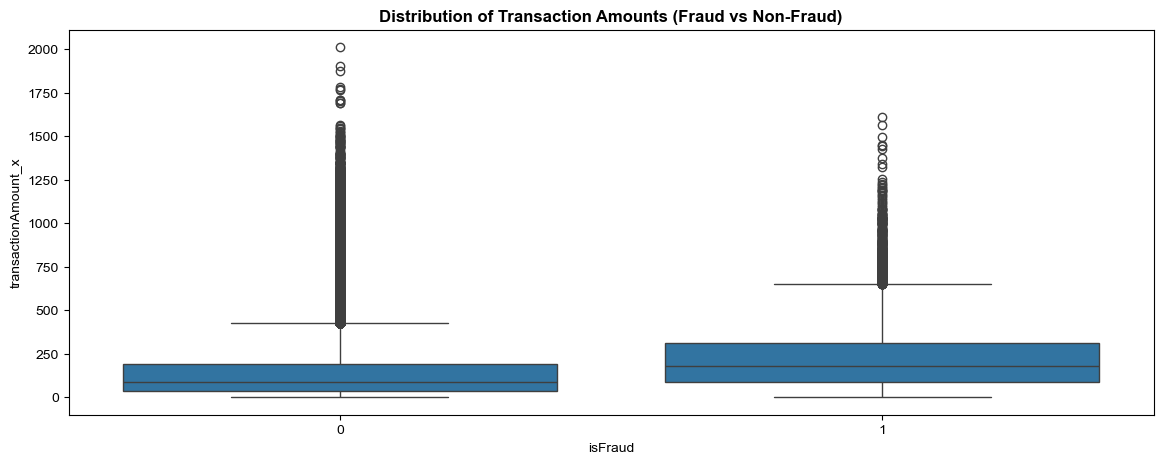

In [83]:
plt.figure(figsize=(14,5))
plt.title('Distribution of Transaction Amounts (Fraud vs Non-Fraud)',weight='bold')
sns.set()
sns.boxplot(x='isFraud', y='transactionAmount_x', data=processed)

In [85]:

processed.shape

(720701, 24)

In [87]:
final_data=processed[['customerId_x','merchantName_x','transactionAmount_x','transactionType_x','transactionKey','Timestamp','creditLimit','availableMoney','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','currentBalance','cardPresent','expirationDateKeyInMatch','isFraud']]

In [89]:
final_data.columns=['customerId','merchantName','transactionAmount','transactionType','transactionKey','Timestamp','creditLimit','availableMoney','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','currentBalance','cardPresent','expirationDateKeyInMatch','isFraud']

In [91]:
final_data.to_csv('clean_data.csv',index=False)

Mismatch in Reversals:
1) 4268 reversal transactions could not be matched with corresponding purchases, indicating potential data quality issues.
2) $499,613.02 is the total dollar amount for these unmatched reversals, highlighting a significant financial impact.

Frequent Multi-Swipes:
1) 7248 multi-swipe transactions were identified, pointing to possible operational or technical issues.
2) $1,069,721.99 is the total dollar amount of multi-swipe transactions, suggesting the need for improved transaction controls.